In [1]:
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

### Data pre-processing

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let's convert String category variables to Integer category variables.

In [4]:
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2])

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


To fit this data in a one layer logistic regression model, the data needs to be linearly separable. Let's see if that's the case.

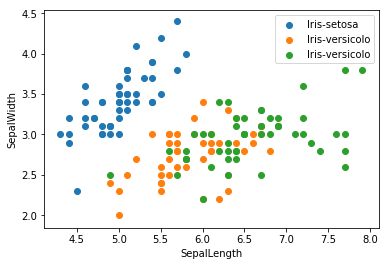

In [6]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:100].SepalLengthCm, iris[51:100].SepalWidthCm, label='Iris-versicolo')
plt.scatter(iris[101:].SepalLengthCm, iris[101:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

Just keep the columns with features.

In [7]:
X = iris.drop(labels=['Id', 'Species'], axis=1).values
y = iris.Species.values

In [8]:
X[:10], y[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [9]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

Randomly select indexes to use for training.

In [10]:
train_index = np.random.choice(len(X), round(len(X) * 0.6), replace=False)

In [11]:
train_index

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70])

In [12]:
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [13]:
test_index, len(test_index)

(array([  2,   3, 134,   7, 137,  10, 139, 140,  15, 144,  17,  18, 147,
        148,  22,  27,  30,  32,  34,  39,  40,  47,  48,  49,  52,  55,
         57,  58,  61,  64,  66,  67,  68,  69,  73,  75,  76,  77,  78,
         83,  84,  85,  92,  94,  96,  97,  98,  99, 102, 105, 106, 107,
        108, 109, 111, 113, 120, 123, 125, 126]), 60)

In [14]:
train_X[0:10], train_y[0:10]

(array([[6.3, 2.5, 4.9, 1.5],
        [6.8, 3. , 5.5, 2.1],
        [6.4, 2.8, 5.6, 2.2],
        [5.6, 3. , 4.1, 1.3],
        [4.9, 3.1, 1.5, 0.1],
        [6. , 3. , 4.8, 1.8],
        [6.3, 2.3, 4.4, 1.3],
        [4.4, 3.2, 1.3, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [5.5, 2.6, 4.4, 1.2]]),
 array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1], dtype=int64))

In [15]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [16]:
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [17]:
train_X[0:10]

array([[0.55555556, 0.22727273, 0.65517241, 0.58333333],
       [0.69444444, 0.45454545, 0.75862069, 0.83333333],
       [0.58333333, 0.36363636, 0.77586207, 0.875     ],
       [0.36111111, 0.45454545, 0.51724138, 0.5       ],
       [0.16666667, 0.5       , 0.06896552, 0.        ],
       [0.47222222, 0.45454545, 0.63793103, 0.70833333],
       [0.55555556, 0.13636364, 0.56896552, 0.5       ],
       [0.02777778, 0.54545455, 0.03448276, 0.04166667],
       [0.02777778, 0.40909091, 0.05172414, 0.04166667],
       [0.33333333, 0.27272727, 0.56896552, 0.45833333]])

### Building Tensorflow Graph
Let's start building Tensorflow model. Tensorflow is a graph based framework. So we have to build the whole graph of our model before we start any kind of training. For most ML problems, the graph building process is pretty straight forward.

- Step 1: Define placeholders for input Data and Labels.
- Step 2: Pass the Data through the layers.
- Step 3: Define a loss function.
- Step 4: Apply Gradient Descent (or other optimisers) on the loss.

Placeholders are special type of Tensorflow variables. These variables don't hold any particular values and are used as input nodes to the graph. The data is fed to these variables in order to Train the model or infer using the model.

- "data" is used for data input. The shape is Batch Size x Input Features. 
- "labels" is used for output labels. Batch Size x Output Space

To keep the batch size "variable", we use None instead of a specific Batch Size.

In [18]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 4], name='Data_Input')
labels = tf.placeholder(dtype=tf.int32, shape=[None, 1], name='Labels_Input')

In [19]:
data

<tf.Tensor 'Data_Input:0' shape=(?, 4) dtype=float32>

In [20]:
data.shape

TensorShape([Dimension(None), Dimension(4)])

Now pass the data through all layers.

In [21]:
labels_size = 3
logits = tf.layers.dense(inputs=data, units=labels_size)

Once we have the logits calculated, lets add the loss operation. Since we're doing logistic regression, the loss function is sigmoid cross entropy.

In [22]:
one_hot_labels = tf.one_hot(tf.cast(labels, tf.int32), depth=labels_size)
one_hot_labels = tf.squeeze(one_hot_labels)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_labels))
tf.summary.scalar('loss', loss)

<tf.Tensor 'loss:0' shape=() dtype=string>

In [23]:
learning_rate = 0.003
batch_size = 30
iter_num = 10000

To train our model, we iterate on the parameter values such that the loss is minimized. To reduce the loss, we have multiple Optimizers available. Let's use Gradient Descent.

In [24]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [25]:
goal = opt.minimize(loss)

Prediction and Accuracy utility operations.

In [26]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.cast(tf.argmax(input=logits, axis=1, name='Prediction'), dtype=tf.int32)
# Bool into float32 type
correct = tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(labels)), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct, name='Accuracy')

tf.summary.scalar('accuracy', accuracy)
# End of the definition of the model framework

<tf.Tensor 'accuracy_1:0' shape=() dtype=string>

In [27]:
merged = tf.summary.merge_all()

In [28]:
loss_trace = []
train_acc = []
test_acc = []

### Training / Evaluating the model
Up until now, we have just built the graph of model in Tensorflow. Now we will start trainig and evaluating the model. To use the model:
- Initialise the model.
- To "Train" the model: feed data and labels and process the model till the "goal" operation.
- To "Evaluate" the model: provide data and lables and process till "accuracy" operation.

Initialisation is pretty standard. We get a session object after initialisation and this session object is used to interact with the graph.

In [29]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [30]:
train_writer = tf.summary.FileWriter('./logistic_regression', sess.graph)

To train the model:
- Get a batch of data and labels.
- Feed data and labels to the graph.
- Check the Train and Test data accuracy.

In [31]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    
    _, summary = sess.run([goal, merged], feed_dict={data: batch_train_X, labels: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, labels: batch_train_y})
    
    train_logit, train_pred, train_corr, train_label = sess.run([logits, prediction, correct, labels],
                                                   feed_dict={data: test_X, labels: np.matrix(test_y).T})
        
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, labels: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, labels: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_writer.add_summary(summary, epoch)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 1.054962 train_acc: 0.355556 test_acc: 0.316667
epoch:  600 loss: 1.034553 train_acc: 0.411111 test_acc: 0.383333
epoch:  900 loss: 0.934401 train_acc: 0.700000 test_acc: 0.583333
epoch: 1200 loss: 0.838584 train_acc: 0.733333 test_acc: 0.633333
epoch: 1500 loss: 0.924443 train_acc: 0.755556 test_acc: 0.666667
epoch: 1800 loss: 0.836608 train_acc: 0.766667 test_acc: 0.666667
epoch: 2100 loss: 0.849139 train_acc: 0.777778 test_acc: 0.666667
epoch: 2400 loss: 0.757630 train_acc: 0.777778 test_acc: 0.666667
epoch: 2700 loss: 0.768777 train_acc: 0.800000 test_acc: 0.666667
epoch: 3000 loss: 0.670883 train_acc: 0.800000 test_acc: 0.700000
epoch: 3300 loss: 0.669076 train_acc: 0.800000 test_acc: 0.700000
epoch: 3600 loss: 0.674075 train_acc: 0.800000 test_acc: 0.700000
epoch: 3900 loss: 0.613756 train_acc: 0.800000 test_acc: 0.700000
epoch: 4200 loss: 0.679639 train_acc: 0.800000 test_acc: 0.700000
epoch: 4500 loss: 0.667105 train_acc: 0.800000 test_acc: 0.700000
epoch: 480

In [ ]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()